## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 
- However, there are some additional questions along the way that don't fit neatly into the one main example we'll walk through. Any question that isn't explicitly part of the main example is marked with **(detour)** at the start of the question.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

# 1.) How must does the answer to each of the 44 questions affect the probability of a certain handedness?

# 2.) Is there an association between handedness and religion?

# 3.) Are women or men more likely to be left-handed?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [2]:
df = pd.read_csv('./data.csv', sep='\t')

### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

# 1.) Did I expressly inform the people how their data may be used?

# 2.) Are the individual question appropriate?  That is, could any of them be considered 'rigged' in the ethical sense, in that they tend to trick the subject into indirectly revealing data he otherwise wouldn't have??

# 3.) What is the ultimate use of the data, could it be used for nefarious ends?

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [3]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
Q1             4184 non-null int64
Q2             4184 non-null int64
Q3             4184 non-null int64
Q4             4184 non-null int64
Q5             4184 non-null int64
Q6             4184 non-null int64
Q7             4184 non-null int64
Q8             4184 non-null int64
Q9             4184 non-null int64
Q10            4184 non-null int64
Q11            4184 non-null int64
Q12            4184 non-null int64
Q13            4184 non-null int64
Q14            4184 non-null int64
Q15            4184 non-null int64
Q16            4184 non-null int64
Q17            4184 non-null int64
Q18            4184 non-null int64
Q19            4184 non-null int64
Q20            4184 non-null int64
Q21            4184 non-null int64
Q22            4184 non-null int64
Q23            4184 non-null int64
Q24            4184 non-null int64
Q25            4184 non-null int64
Q26            418

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.dtypes

Q1              int64
Q2              int64
Q3              int64
Q4              int64
Q5              int64
Q6              int64
Q7              int64
Q8              int64
Q9              int64
Q10             int64
Q11             int64
Q12             int64
Q13             int64
Q14             int64
Q15             int64
Q16             int64
Q17             int64
Q18             int64
Q19             int64
Q20             int64
Q21             int64
Q22             int64
Q23             int64
Q24             int64
Q25             int64
Q26             int64
Q27             int64
Q28             int64
Q29             int64
Q30             int64
Q31             int64
Q32             int64
Q33             int64
Q34             int64
Q35             int64
Q36             int64
Q37             int64
Q38             int64
Q39             int64
Q40             int64
Q41             int64
Q42             int64
Q43             int64
Q44             int64
introelapse     int64
testelapse

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Q1,4184.0,1.962715,1.360291,0.0,1.0,1.0,3.00,5.0
Q2,4184.0,3.829589,1.551683,0.0,3.0,5.0,5.00,5.0
Q3,4184.0,2.846558,1.664804,0.0,1.0,3.0,5.00,5.0
Q4,4184.0,3.186902,1.476879,0.0,2.0,3.0,5.00,5.0
Q5,4184.0,2.865440,1.545798,0.0,1.0,3.0,4.00,5.0
Q6,4184.0,3.672084,1.342238,0.0,3.0,4.0,5.00,5.0
Q7,4184.0,3.216539,1.490733,0.0,2.0,3.0,5.00,5.0
Q8,4184.0,3.184512,1.387382,0.0,2.0,3.0,4.00,5.0
Q9,4184.0,2.761233,1.511805,0.0,1.0,3.0,4.00,5.0
Q10,4184.0,3.522945,1.242890,0.0,3.0,4.0,5.00,5.0


---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: Classification, the target is discrete

### (detour) 6. While this isn't the problem we set out to solve, suppose I wanted to predict the age of the respondent using Q1 - Q44 as my predictors. Would this be a classification or regression problem? Why?

Answer: regression, the target(age) would be continuous


### 7. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: So that all the values will be on the same scale, to be better compared to each other.  We usually standardize when the typical values of one feature are far smaller or greater than the typical values of other features.  For example concentration of nitrous oxide(NOX) in the Boston housing dataset is measured, which is measured in parts-per-million, is much lower than the typical values(or units) of just about every other variable in the dataset.  

### 8. Give an example of when we might not standardize our variables.

Answer: I was told we would always standardize them.  But's I suppose it's not impossible to imagine a situation in which we wouldn't, like for example if our dataset consisted of only categorical dummy variables, then they are already all on the same scale, and it would be hard to see the benefit in performing this standardization.

### 9. Based on your answers to 7 and 8, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: Honestly, no I don't think we should, unless we are using age or the two time-based variables, and I think that would just make the data really messy and indecipherable, all unnessesarily.  But I may change my mind after playing with the data a bit.  

### 10. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

In [8]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


Answer: 

In [9]:
df['age'].sort_values(ascending=False)

2690    23763
2137      409
2075      123
2101       86
1736       86
3436       85
1909       78
3182       77
369        76
1284       73
1293       70
3062       70
3403       70
518        69
813        68
2508       68
1071       68
1697       67
1091       67
2804       67
2348       67
1246       67
1103       67
3061       67
1719       65
865        65
1368       65
1029       65
872        65
1031       65
        ...  
221        14
2017       14
1192       14
1204       14
1946       14
4032       14
2668       14
2008       14
1863       14
284        13
100        13
10         13
1511       13
3422       13
828        13
1760       13
76         13
2789       13
3905       13
3463       13
2014       13
1459       13
1532       13
859        13
37         13
1670       13
3828       13
1642       13
1333       13
2550       13
Name: age, Length: 4184, dtype: int64

In [10]:
df.drop(df[df['hand']==0].index, inplace=True)

In [11]:
df.drop(df[df['age']>100].index, inplace=True)

In [12]:
y = df['hand']

In [13]:
df.drop(['hand'], axis=1, inplace=True)

In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country_UA,country_US,country_UY,country_UZ,country_VE,country_VI,country_VN,country_ZA,country_ZM,country_ZW
0,4,1,5,1,5,1,5,1,4,1,...,0,1,0,0,0,0,0,0,0,0
1,1,5,1,4,2,5,5,4,1,5,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1,1,5,4,3,2,1,4,...,0,0,0,0,0,0,0,0,0,0
3,1,4,1,5,1,4,5,4,3,5,...,0,1,0,0,0,0,0,0,0,0
4,5,1,5,1,5,1,5,1,3,1,...,0,1,0,0,0,0,0,0,0,0


In [16]:
# df.drop(['testelapse','introelapse'], axis=1, inplace = True)

### 11. The professor for whom you work suggests that you set $k = 4$. Why might this be a bad idea in this specific case?

Answer: there are a lot of predictor variables in this dataset, so k=4 neighbors might not be sufficient.

### 12. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=0, stratify = y)

In [18]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [19]:
params_grid = {
    'knn__n_neighbors': np.arange(3, 26, 1)
    
}

In [20]:
gs = GridSearchCV(pipe, params_grid)

In [21]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'knn__n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'))])

In [23]:
gs.score(X_train,y_train)

0.8507033248081841

In [24]:
gs.score(X_test, y_test)

0.8456375838926175

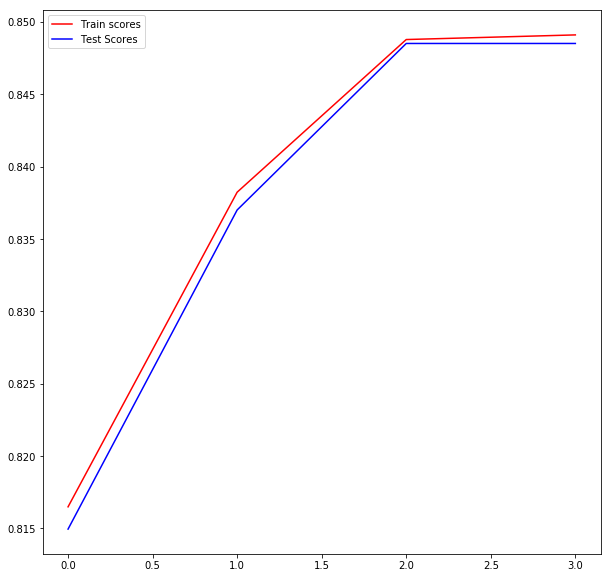

In [25]:
train_scores = []
test_scores = []

for k in [3, 5, 15, 25]:
    # Create knn with our test k
    test_knn = KNeighborsClassifier(n_neighbors=k)
    
    # Cross val score on training data
    train_score = cross_val_score(test_knn, X_train, y_train).mean()
    train_scores.append(train_score)
    
    # fit the model
    test_knn.fit(X_train, y_train)
    
    # score the model on test set
    test_score = test_knn.score(X_test, y_test)
    test_scores.append(test_score)
    
    

plt.figure(figsize=(10, 10))
plt.plot(train_scores, c='r', label='Train scores')
plt.plot(test_scores, c='b', label='Test Scores')

plt.legend()

In [26]:
knn_preds = gs.predict(X_test)

In [27]:
confusion_matrix(y_test, knn_preds)

array([[882,   3,   0],
       [113,   0,   0],
       [ 45,   0,   0]])

In [28]:
len(y_test)

1043

In [29]:
print(classification_report(y_test, knn_preds))

             precision    recall  f1-score   support

          1       0.85      1.00      0.92       885
          2       0.00      0.00      0.00       113
          3       0.00      0.00      0.00        45

avg / total       0.72      0.85      0.78      1043



/Users/richardmason/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: yes, the documentation specifies that the default regularization is ridge, or l2.

### 14. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features? Well, the answer is (as always), **it depends**. What is one reason you would standardize? What is one reason you would not standardize?

Answer:
- An example of when I would standardize in logistic regression is... If we were also using ridge or lasso regression along with logisitc regression.  Otherwise, the concensus when it comes specifically to logistic regression is 'NO.'

https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression


### 15. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

# As mentioned above, since we are using logistic regression with regularization, we should standardize(looking at this more closely, i'm curious if we ever use logistic regression without regularization, standardization.. it certainly doesn't seem to be a possibility

In [30]:
# ss = StandardScaler()

# X_train_scaled = ss.fit_transform(X_train)

# X_test_scaled = ss.transform(X_test)

In [31]:
pipe_log = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression()),
    
])

In [32]:
params_grid_log = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': [1, 1/10]
}

In [33]:
gs_log = GridSearchCV(pipe_log, params_grid_log)
gs_log.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lr__penalty': ['l1', 'l2'], 'lr__C': [1, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
print(gs_log.best_estimator_)
print(gs_log.score(X_train, y_train))
print(gs_log.score(X_test, y_test))
print(gs_log.best_params_)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])
0.8519820971867008
0.8475551294343241
{'lr__C': 0.1, 'lr__penalty': 'l1'}


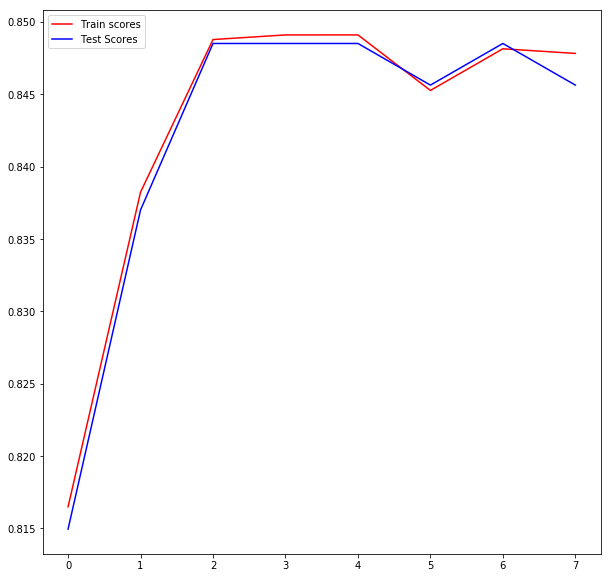

In [35]:
train_scores_log = []

test_scores_log = []

for penalty in ['l1', 'l2']:
    for C in [1, 10]:
    # Create knn with our test k
        test_log = LogisticRegression(penalty = penalty, C = C)
    
    # Cross val score on training data
        train_score = cross_val_score(test_log, X_train, y_train).mean()
        train_scores.append(train_score)
    
    # fit the model
        test_log.fit(X_train, y_train)
    
    # score the model on test set
        test_score = test_log.score(X_test, y_test)
        test_scores.append(test_score)
    
    

plt.figure(figsize=(10, 10))
plt.plot(train_scores, c='r', label='Train scores')
plt.plot(test_scores, c='b', label='Test Scores')

plt.legend()

In [36]:
# logreg_lasso_1 = LogisticRegression(penalty = 'l1', C=1)

# logreg_lasso_10 = LogisticRegression(penalty = 'l1', C=1/10)

# logreg_ridge_1 = LogisticRegression(penalty='l2', C=1)

# logreg_ridge_10 = LogisticRegression(penalty='l2', C=1/10)

# logreg_lasso_1.fit(X_train_scaled, y_train)

# logreg_lasso_10.fit(X_train_scaled, y_train)

# logreg_ridge_1.fit(X_train_scaled, y_train)

# logreg_ridge_10.fit(X_train_scaled, y_train)

### (detour) 16. Suppose that, instead of predicting whether or not someone was left-handed, you wanted to predict whether someone was right-handed, left-handed, both, or missing. What type of *(hint: generalized linear)* model would you try to fit here? Why?

Answer: Binomial?

### (detour) 17. Suppose that, instead of predicting whether or not someone was left-handed, you wanted to predict someone's level of education *(1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree)* based on their personality question responses. What type of *(hint: generalized linear)* model would you try to fit here? Why?

Answer: poisson?

### (detour) 18. Suppose that, instead of predicting whether or not someone was left-handed, you wanted to predict someone's age based on their personality question responses. Realistically, we would probably fit a multiple linear regression model. However, if I tried to fit a GLM here, what type of model would be most appropriate? Why?

Answer: poisson

---
## Step 5: Evaluate the model(s).

### 19. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)

In [37]:
print(gs.cv_results_['mean_train_score'][0])
print(gs.cv_results_['mean_train_score'][2])
print(gs.cv_results_['mean_train_score'][12])
print(gs.cv_results_['mean_train_score'][22])
print(gs.cv_results_['mean_test_score'][0])
print(gs.cv_results_['mean_test_score'][2])
print(gs.cv_results_['mean_test_score'][12])
print(gs.cv_results_['mean_test_score'][22])


print(gs_log.cv_results_['mean_train_score'][0])
print(gs_log.cv_results_['mean_train_score'][1])
print(gs_log.cv_results_['mean_train_score'][2])
print(gs_log.cv_results_['mean_train_score'][3])
print(gs_log.cv_results_['mean_test_score'][0])
print(gs_log.cv_results_['mean_test_score'][1])
print(gs_log.cv_results_['mean_test_score'][2])
print(gs_log.cv_results_['mean_test_score'][3])

0.8670099968777009
0.852461862252018
0.8489452886102334
0.8491049307174725
0.8152173913043478
0.8369565217391305
0.8487851662404092
0.8491048593350383
0.8539003281174377
0.8542197656864857
0.8521421179738303
0.8534206350228714
0.8452685421994884
0.8455882352941176
0.84846547314578
0.8462276214833759


/Users/richardmason/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [38]:
# # Knn scores:
# knn5_preds = knn5.predict(X_test)
# knn15_preds = knn15.predict(X_test)
# knn25_preds = knn25.predict(X_test)
# print('accuracy of knn, k =3: ', accuracy_score(y_test, knn3_preds))
# print('accuracy of knn, k =5: ', accuracy_score(y_test, knn5_preds))
# print('accuracy of knn, k =15: ', accuracy_score(y_test, knn15_preds))
# print('accuracy of knn, k =25: ', accuracy_score(y_test, knn25_preds))

# logreg_lasso_1preds = logreg_lasso_1.predict(X_test_scaled)
# logreg_lasso_10preds = logreg_lasso_10.predict(X_test_scaled)
# logreg_ridge_1preds = logreg_ridge_1.predict(X_test_scaled)
# logreg_ridge_10preds = logreg_ridge_10.predict(X_test_scaled)
# print('\naccuracy of logreg_lasso, alpha=1: ', accuracy_score(y_test, logreg_lasso_1preds))
# print('\naccuracy of logreg_lasso, alpha=10: ', accuracy_score(y_test, logreg_lasso_10preds))
# print('\naccuracy of logreg_ridge, alpha=1: ', accuracy_score(y_test, logreg_ridge_1preds))
# print('\naccuracy of logreg_ridge, alpha=10: ', accuracy_score(y_test, logreg_ridge_10preds))

### 20. In which of your $k$-NN models is there evidence of overfitting? How do you know?

In [39]:
# print('knn with 3 neighbors train score: \n', knn3.score(X_train, y_train))

# print('knn with 5 neighbors train score: \n', knn5.score(X_train, y_train))

# print('knn with 15 neighbors train score: \n', knn15.score(X_train, y_train))

# print('knn with 25 neighbors train score: \n', knn25.score(X_train, y_train))

# print('knn with 3 neighbors test score: \n', knn3.score(X_test, y_test))

# print('knn with 5 neighbors test score: \n', knn5.score(X_test, y_test))

# print('knn with 15 neighbors test score: \n', knn15.score(X_test, y_test))

# print('knn with 25 neighbors test score: \n', knn25.score(X_test, y_test))

print('There is evidence of overfitting when k=3 and k=5, because \nthe test scores are much lower than the train scores')

There is evidence of overfitting when k=3 and k=5, because 
the test scores are much lower than the train scores


### 21. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: As k increases, variance seems to decrease up to a certain point, as evidenced by a convergence of scores on the train and test sets.  As k increases, bias seems to decrease up to a certain point also, as evidenced by increasing scores on the test set, up to k=15. 

### 22. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: 1.) increase n_neighbors.  2.) i can't come up with anything else specific to kNN

### 22. In which of your logistic regression models is there evidence of overfitting? How do you know?

# apparently none of them?  At least not a significant amount

In [40]:
print('\naccuracy of logreg_lasso, alpha=1, train: ', gs_log.cv_results_['mean_train_score'][0])
print('\naccuracy of logreg_lasso, alpha=10, train: ', gs_log.cv_results_['mean_train_score'][1])
print('\naccuracy of logreg_ridge, alpha=1, train: ', gs_log.cv_results_['mean_train_score'][2])
print('\naccuracy of logreg_ridge, alpha=10, train: ', gs_log.cv_results_['mean_train_score'][3])



print('\naccuracy of logreg_lasso, alpha=1, test: ', gs_log.cv_results_['mean_test_score'][0])
print('\naccuracy of logreg_lasso, alpha=10, test: ', gs_log.cv_results_['mean_test_score'][1])
print('\naccuracy of logreg_ridge, alpha=1, test: ', gs_log.cv_results_['mean_test_score'][2])
print('\naccuracy of logreg_ridge, alpha=10, test: ', gs_log.cv_results_['mean_test_score'][3])


accuracy of logreg_lasso, alpha=1, train:  0.8539003281174377

accuracy of logreg_lasso, alpha=10, train:  0.8542197656864857

accuracy of logreg_ridge, alpha=1, train:  0.8521421179738303

accuracy of logreg_ridge, alpha=10, train:  0.8534206350228714

accuracy of logreg_lasso, alpha=1, test:  0.8452685421994884

accuracy of logreg_lasso, alpha=10, test:  0.8455882352941176

accuracy of logreg_ridge, alpha=1, test:  0.84846547314578

accuracy of logreg_ridge, alpha=10, test:  0.8462276214833759


/Users/richardmason/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


### 23. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

An increasing value of C means a DESCREASING value of the regularization strength.  Since regularization is akin to introducing bias, then as C increases, our bias will tend to decrease also

### 24. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

#1 Decrease the value of C, in order to increase the regularization strength, which would tend to increase the bias and decrease the variance, and in so doing combat overfitting

---
## Step 6: Answer the problem.

### 25. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Knn provided the better scores overall.  yet I have a hunch that logistic regression is just better for this type of classification into 0 or 1, I couldn't really explain why though

### 26. Select your best logistic regression model. Interpret the coefficient for `Q1`.

# The coefficient for Q1 is 0.040, so a one unit increase in Q1 would lead to an e^0.04 increase in the probability of being left handed

In [41]:
# gs_log.fit(X_test,y_test)
# #gs_log.l=/
# #pipe_log.named_steps['lr'].coef_


In [42]:
pipe_log.named_steps['lr']#.coef_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
log_coefs = gs_log.best_estimator_.named_steps['lr'].coef_

In [44]:
log_coefs

array([[-4.79805435e-02,  9.30405590e-02, -1.70946320e-02,
        -1.87443566e-02, -6.39547122e-02,  5.81772137e-02,
        -1.90194186e-03,  2.14789248e-02,  0.00000000e+00,
         1.04922228e-02, -2.81174535e-02, -3.80127450e-02,
         1.15534899e-02,  0.00000000e+00,  1.01888256e-02,
         0.00000000e+00, -4.91867339e-02,  2.02797724e-02,
         2.53938814e-02,  0.00000000e+00,  0.00000000e+00,
         6.23098104e-02,  1.20354312e-01,  0.00000000e+00,
         0.00000000e+00, -4.79554248e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.48739757e-02,
         0.00000000e+00,  0.00000000e+00, -1.61894151e-02,
        -2.60112195e-02, -1.66861391e-01,  0.00000000e+00,
         2.45413797e-02, -6.12304259e-02,  9.67198647e-02,
         5.14284937e-02,  4.49438422e-03,  0.00000000e+00,
         1.32362164e-02,  0.00000000e+00,  2.85350168e-02,
         1.10225244e-02,  2.19149360e-03,  1.95694299e-01,
        -4.24538644e-02,  0.00000000e+00,  3.64192758e-0

### 27. If you have to select one model overall to be your *best* model, which model would you select? Why?

Answer: Logistic regression with l1 penalty and alpha = 10... because it has, all things considered, the best bias/variance tradeoff.  The accuracy is just as good as any of the knn models, meanwhile the overfitting is consitently lower with all of the logistic models, meaning the variance tends to be lower.  I also consider knn with k=15 just as good

### 28. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer these for the professor based on the model you selected!

# 1.) How must does the answer to each of the 44 questions affect the probability of a certain handedness?

# 2.) Is there an association between handedness and religion?

# 3.) Are women or men more likely to be left-handed?

In [45]:
coef_df = pd.DataFrame({
    'coefs': X_train.columns,
    'vals': log_coefs[0]
}).set_index('coefs').sort_values('vals', ascending=False)

In [46]:
coef_df

,vals
coefs,
engnat,0.195694
Q23,0.120354
Q39,0.096720
Q2,0.093041
country_AU,0.070755
race,0.069911
country_BR,0.062956
Q22,0.062310
country_IN,0.059164


In [47]:
print(coef_df[(coef_df['vals'] > 0.1) | (coef_df['vals']< -0.1)])
print(coef_df.loc['religion',:])
print(coef_df.loc['gender',:])


                 vals
coefs                
engnat       0.195694
Q23          0.120354
country_PH  -0.101431
orientation -0.142275
Q35         -0.166861
vals    0.0
Name: religion, dtype: float64
vals    0.036419
Name: gender, dtype: float64


In [48]:
df.columns.get_loc('religion')


53

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following:
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)
- Fit and evaluate one or more of the generalized linear models discussed above.
- Create a plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?